# MP 1
### Jan Carlo Roleda

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### 1. [Matrix Analysis] Resize the images from this dataset. into 32 by 32 matrices then aggregate them into one variable.
- Visualize the images using Pyplot.
- The result should be (6,32,32,3)
- Explain the shape of the resulting variable and the quality of the images

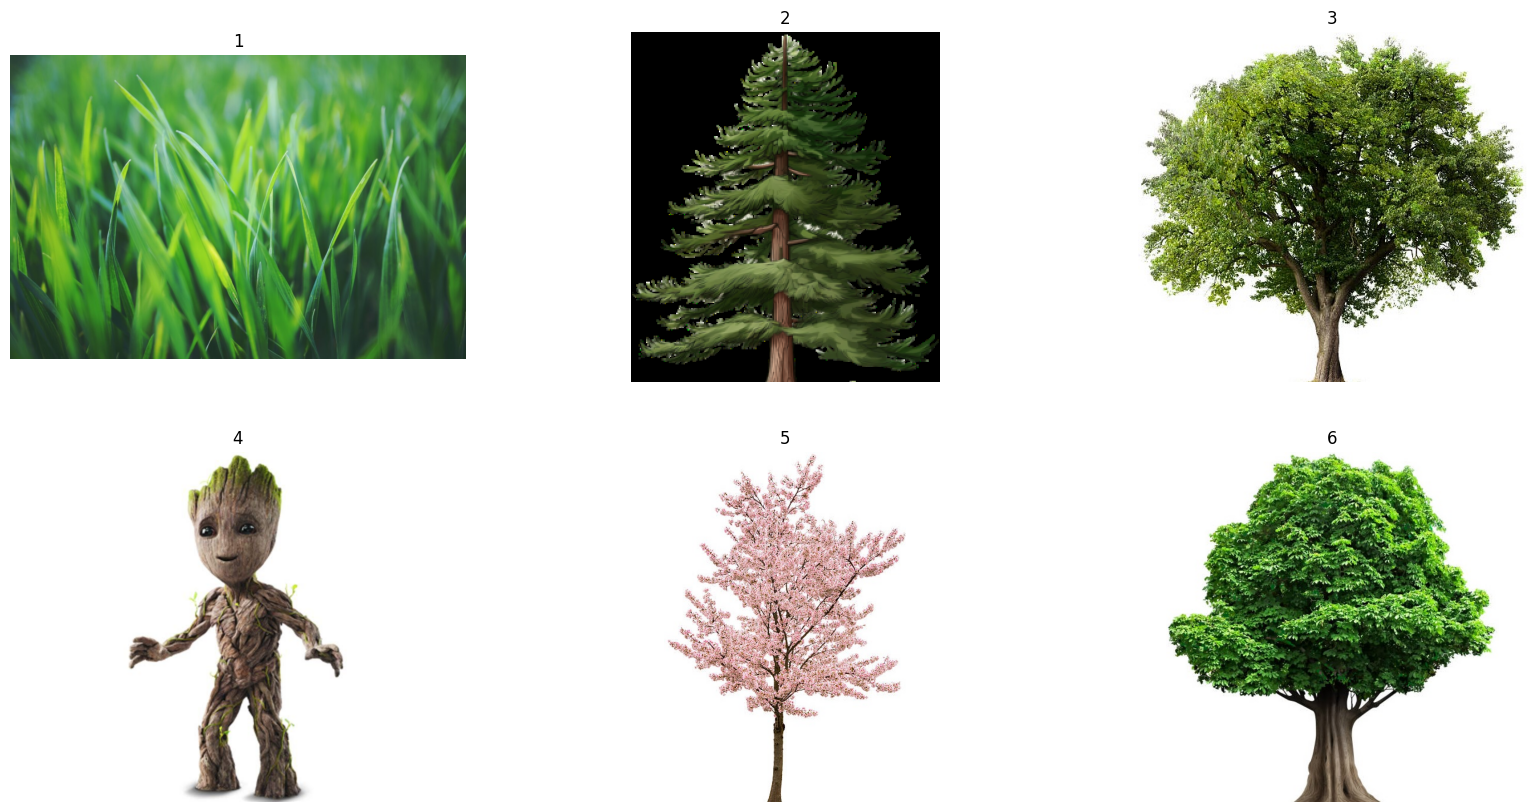

In [2]:
fig = plt.figure(figsize=(20,10))
row = 2
col = 3

for i in range(1,7):
	name = "data" + str(i) + (".jpg" if i != 2 else ".png")
	fig.add_subplot(row, col, i)
	plt.title(str(i))
	plt.imshow( cv.cvtColor(cv.imread(name), cv.COLOR_BGR2RGB))
	plt.axis("off")

In [3]:
image_group = cv.resize(cv.cvtColor(cv.imread("data1.jpg"), cv.COLOR_BGR2RGB), (32,32))
image_group = np.expand_dims(image_group, axis=0)
for i in range(2,7):
	name = "data" + str(i) + (".jpg" if i != 2 else ".png")
	image = cv.resize(cv.cvtColor(cv.imread(name), cv.COLOR_BGR2RGB), (32,32))
	image_group = np.concatenate((image_group, np.expand_dims(image, axis=0)), axis=0)

image_group.shape

(6, 32, 32, 3)

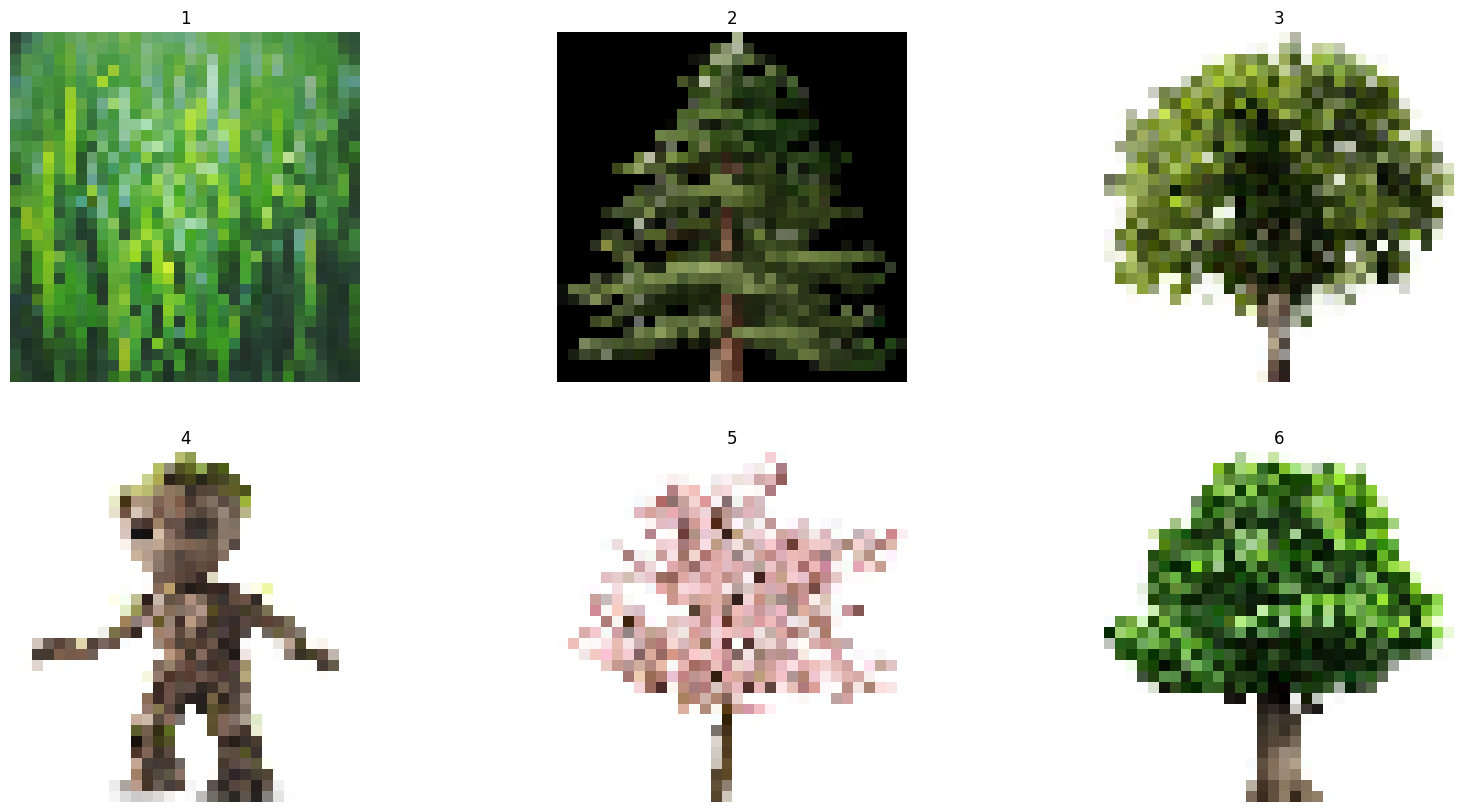

In [4]:
fig = plt.figure(figsize=(20,10))

row = 2
col = 3

for i in range(image_group.shape[0]):
	img = image_group[i]
	fig.add_subplot(row, col, i+1)
	plt.imshow(img)
	plt.axis('off')
	plt.title(str(i+1))


In [5]:
np.save("part1", image_group)

The resulting images are extremely pixelated (as it's a 32x32 image), but the general outline of the image and its colors are preserved.

___

### 2. [Image Statistics] Take the first image:
- How many pixels are there in total?
- Take the average of each pixel per channel.
- How many pixels are equal to 0.5 and less than 0.5?
- - Clue 1: normalize the image first.
- - Clue 2: Create a histogram for the image. The total number of bins should match the nominal pixel values of a grayscale image.
- Report the results for the images and your image.

In [6]:
#load image
img = image_group[0]

In [7]:
#get image pixel size
img_shape = img.shape
total_pixel = img_shape[0] * img_shape[1]
total_pixel

1024

In [8]:
img_r, img_g, img_b = cv.split(img)

In [9]:
channel_mean = []
channel_mean.append(img_r.mean())
channel_mean.append(img_g.mean())
channel_mean.append(img_b.mean())
channel_mean

[76.6474609375, 136.4482421875, 63.998046875]

In [10]:
norm_img = img / 256

% below 0.5: 0.8984
% above 0.5: 0.1016


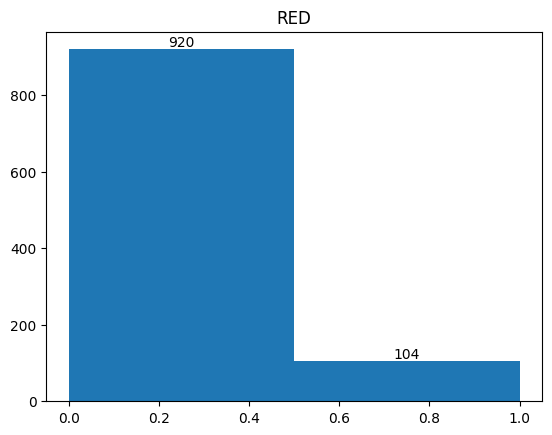

In [11]:
plt.title("RED")
hist_red_50, _, bars = plt.hist(np.ndarray.flatten(norm_img[:,:,0]), bins=2, range=[0,1])
plt.bar_label(bars)

percent_red_50 = hist_red_50 / total_pixel
print("% below 0.5: {:.4f}".format(percent_red_50[0]))
print("% above 0.5: {:.4f}".format(percent_red_50[1]))

% below 0.5: 0.3604
% above 0.5: 0.6396


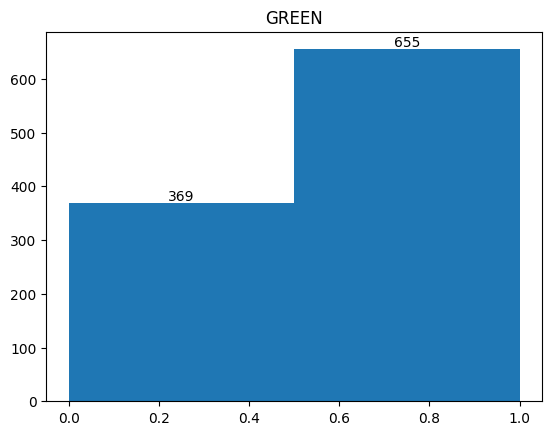

In [12]:
plt.title("GREEN")
hist_green_50, _, bars = plt.hist(np.ndarray.flatten(norm_img[:,:,1]), bins=2, range=[0,1])
plt.bar_label(bars)

percent_green_50 = hist_green_50 / total_pixel
print("% below 0.5: {:.4f}".format(percent_green_50[0]))
print("% above 0.5: {:.4f}".format(percent_green_50[1]))

% below 0.5: 0.9355
% above 0.5: 0.0645


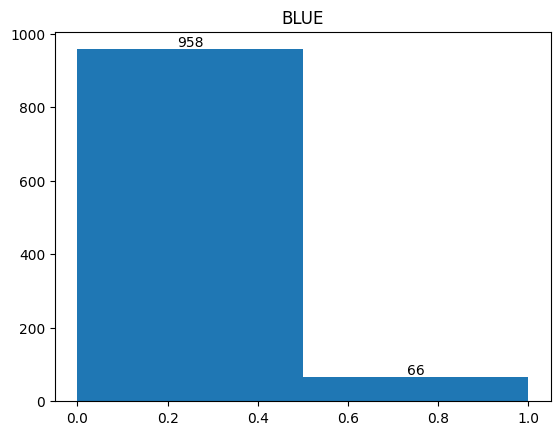

In [13]:
plt.title("BLUE")
hist_blue_50, _, bars = plt.hist(np.ndarray.flatten(norm_img[:,:,2]), bins=2, range=[0,1])
plt.bar_label(bars)

percent_blue_50 = hist_blue_50 / total_pixel
print("% below 0.5: {:.4f}".format(percent_blue_50[0]))
print("% above 0.5: {:.4f}".format(percent_blue_50[1]))

## 2. Results (For image 1):

Total Pixels: 1024

Per-channel Metrics:

Red: 
Mean: 76.6474609375
# below 0.5: 920 (89.84%)
# above 0.5: 104 (10.16%)

Green: 
Mean: 136.4482421875
# below 0.5: 369 (36.04%)
# above 0.5: 655 (63.96%)

Blue: 
Mean: 63.998046875
# below 0.5: 958 (93.55%)
# above 0.5: 66 (6.45%)


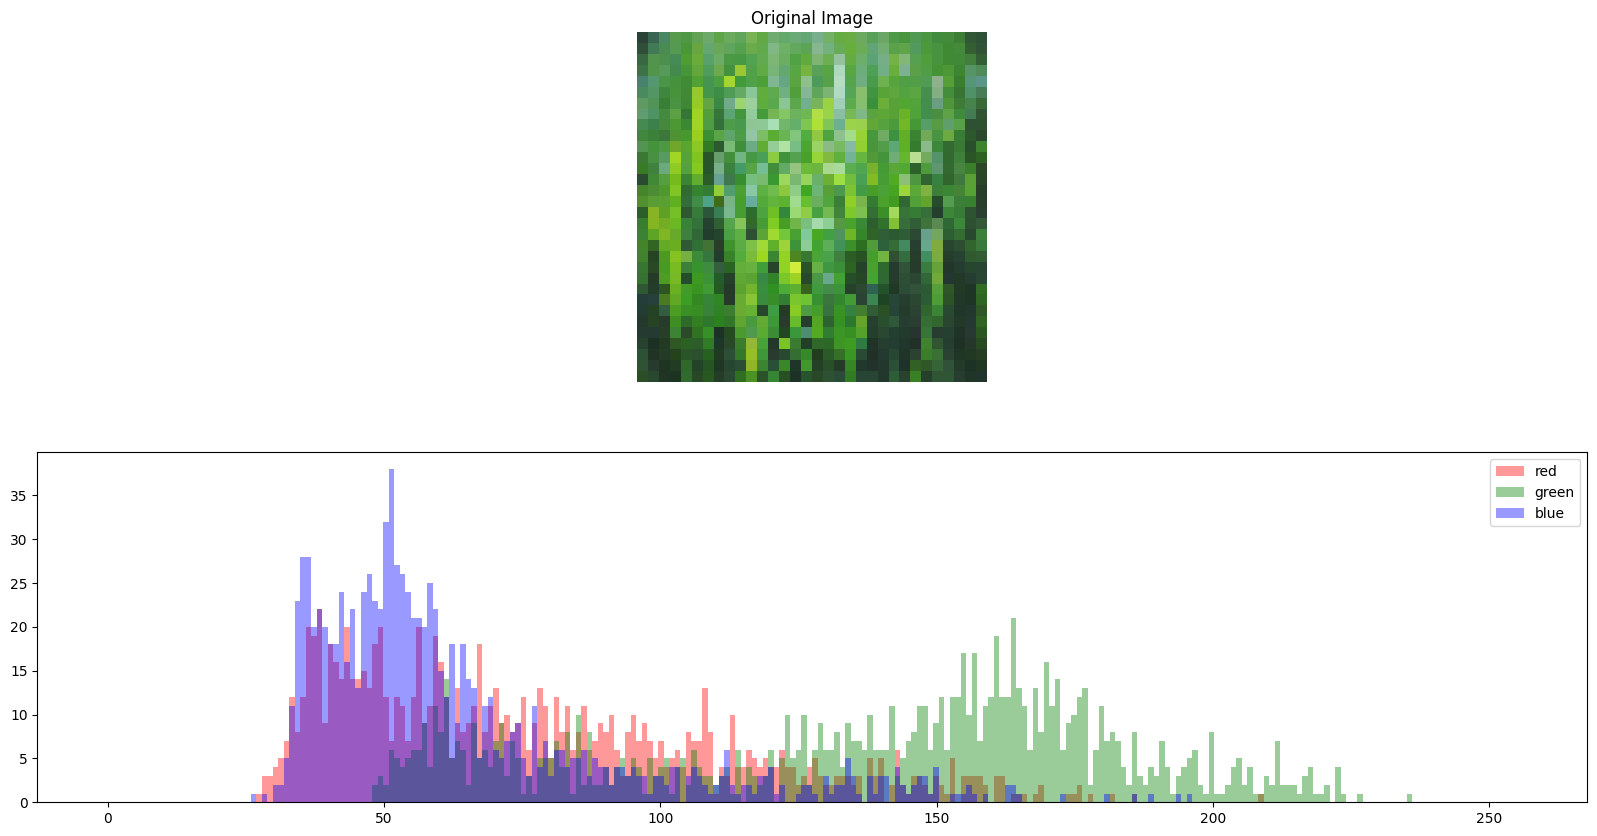

In [14]:
fig = plt.figure(figsize=(20,10))
row = 2
col = 1

fig.add_subplot(row, col, 1)
plt.imshow(img)
plt.axis('off')
plt.title("Original Image")

print("Total Pixels: {}".format(total_pixel))

print("\nPer-channel Metrics:")

print("\nRed: ")
print("Mean: {}".format(channel_mean[0]))
print("# below 0.5: {num:.0f} ({pct:.2f}%)".format(num=hist_red_50[0],pct=percent_red_50[0]*100))
print("# above 0.5: {num:.0f} ({pct:.2f}%)".format(num=hist_red_50[1],pct=percent_red_50[1]*100))

print("\nGreen: ")
print("Mean: {}".format(channel_mean[1]))
print("# below 0.5: {num:.0f} ({pct:.2f}%)".format(num=hist_green_50[0],pct=percent_green_50[0]*100))
print("# above 0.5: {num:.0f} ({pct:.2f}%)".format(num=hist_green_50[1],pct=percent_green_50[1]*100))

print("\nBlue: ")
print("Mean: {}".format(channel_mean[2]))
print("# below 0.5: {num:.0f} ({pct:.2f}%)".format(num=hist_blue_50[0],pct=percent_blue_50[0]*100))
print("# above 0.5: {num:.0f} ({pct:.2f}%)".format(num=hist_blue_50[1],pct=percent_blue_50[1]*100))

fig.add_subplot(row, col, 2)
hist_r = plt.hist(np.ndarray.flatten(img_r), bins=256, range=[0,255], label='red', color='red', alpha=0.4)
hist_g = plt.hist(np.ndarray.flatten(img_g), bins=256, range=[0,255], label='green', color='green', alpha=0.4)
hist_b = plt.hist(np.ndarray.flatten(img_b), bins=256, range=[0,255], label='blue', color='blue', alpha=0.4)
plt.legend(loc='upper right')
plt.show()

___

### 3. [Basic Signal Processing] Take the first image:
- Apply amplification and attenuation operations onto the image by a factor of 0.3.
- - What did you notice? What does the operation imply?
- Try to do element-wise multiplication of the values 0.1, 0,2, 0.5, and 1.0 to the image.
- - What happened?
- - Inspect the values of the matrix and determine the error
- - Resolve the error using your knowledge of matrix algebra and signal processing. Explain your solution.
- Compute the Euclidean distances between all of the images.
- - What were the values?
- - What did you observe from images 1, 3, and 5? Experiment further and discuss your findings.

In [15]:
img = image_group[0]

In [16]:
amp_img = np.clip(np.int16(img / 0.3), 0, 255)

att_img = np.int16(img * 0.3)

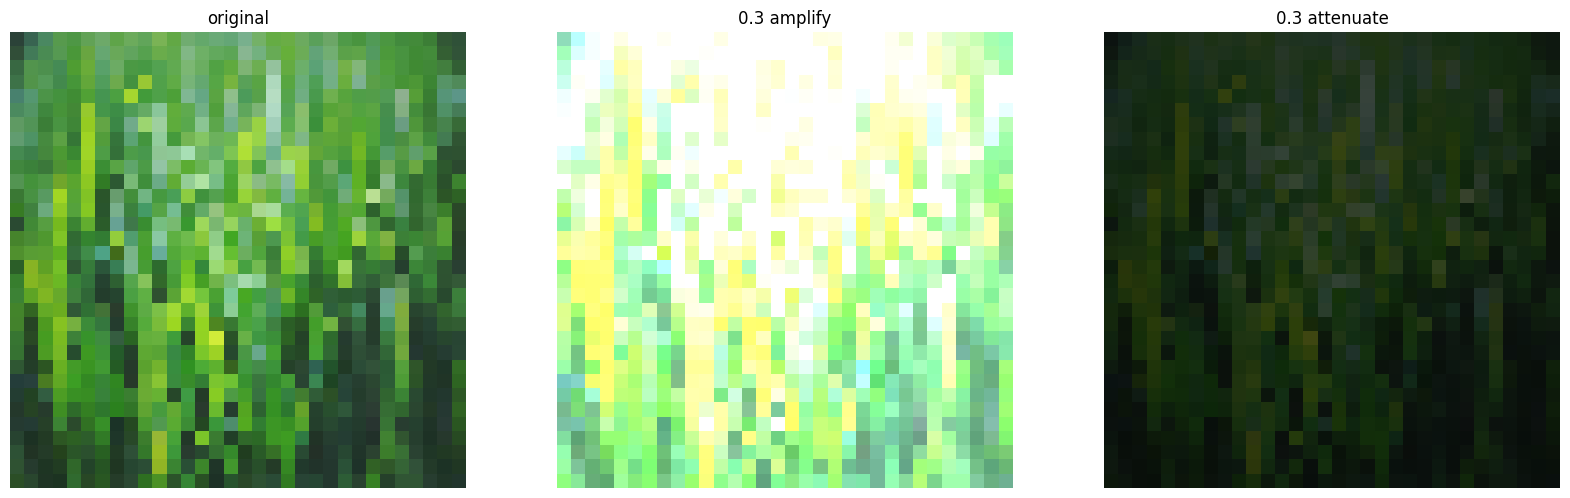

In [17]:
fig = plt.figure(figsize=(20,15))
row = 1
col = 3

fig.add_subplot(row, col, 1)
plt.title("original")
plt.axis('off')
plt.imshow(img)


fig.add_subplot(row, col, 2)
plt.title("0.3 amplify")
plt.axis('off')
plt.imshow(amp_img)

fig.add_subplot(row, col, 3)
plt.title("0.3 attenuate")
plt.axis('off')
plt.imshow(att_img)

The amplification and attenuation functions are essentially elementwise operations with a scalar factor, in this case 0.3

In this case, amplifying the image causes some pixels to go over the permissible pixel range of [0,255], so `np.clip()` is used to ensure the matrix follows image specifictions.

In [18]:
def attenuate_img(img):
	img_0_1 = np.int16(img * 0.1)
	img_0_2 = np.int16(img * 0.2)
	img_0_5 = np.int16(img * 0.5)
	img_1_0 = np.int16(img * 1.0)
 
	return img_0_1, img_0_2, img_0_5, img_1_0

In [19]:
img1_01, img1_02, img1_05, img1_10 = attenuate_img(img)

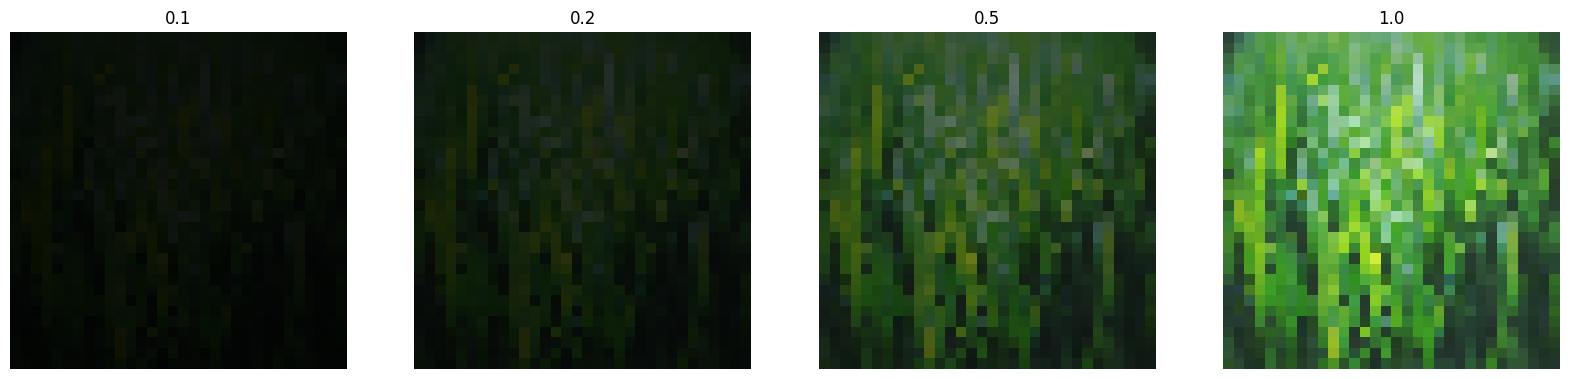

In [20]:
fig_img = plt.figure(figsize=(20,30))

row = 1
col = 4

fig_img.add_subplot(row, col, 1)
plt.title("0.1")
plt.axis('off')
plt.imshow(img1_01)

fig_img.add_subplot(row, col, 2)
plt.title("0.2")
plt.axis('off')
plt.imshow(img1_02)

fig_img.add_subplot(row, col, 3)
plt.title("0.5")
plt.axis('off')
plt.imshow(img1_05)

fig_img.add_subplot(row, col, 4)
plt.title("1.0")
plt.axis('off')
plt.imshow(img1_10)

Multiplying the image with a scalar below 0 is the same as attenuating the image's pixels down by the factor provided. The result of which is similar to previously, where resulting pixels are lower in value and thus darker in color across all channels.

In [21]:
from math import sqrt

def euclidean_dist_mat(mat1, mat2):
    mat1 = np.int32(mat1)
    mat2 = np.int32(mat2)
    return sqrt(np.sum((mat1-mat2)**2, dtype=np.uint64))

The euclidean distance between 2 images is calculated by getting the square root sum of squared differences of each pixel on the respective images. There were issues with the datatype causing int overflows which is remedied by typecasting the matrices to int32 before subtracting and squaring each element.

In [22]:
def print_dists(dist_mat):

	#add euclidean distances to lower part of matrix for better visualization
	for i in range(6):
		for j in range(6):
			if j > i:
				dist_mat[j,i] = dist_mat[i,j]

	fig, ax = plt.subplots()
 
	caxes = ax.matshow(dist_mat)
 
	fig.colorbar(caxes)
 
	img_labels = [str(i) for i in range(1,7)]
 
	ax.set_xticks([0,1,2,3,4,5], img_labels)
	ax.set_yticks([0,1,2,3,4,5], img_labels)
 
	for (i,j), z in np.ndenumerate(dist_mat):
		ax.text(j, i, '%.2f' % z, ha='center', va='center',
          	bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
	

	plt.show()

The above function is just to display the distances between each image, given the way I computed and stored them below.

Euclidean Distance of 1 & 1: 0.0000
Euclidean Distance of 1 & 2: 4683.0950
Euclidean Distance of 1 & 3: 7243.0751
Euclidean Distance of 1 & 4: 8201.4538
Euclidean Distance of 1 & 5: 8452.4018
Euclidean Distance of 1 & 6: 7599.0607
Euclidean Distance of 2 & 2: 0.0000
Euclidean Distance of 2 & 3: 9162.1601
Euclidean Distance of 2 & 4: 11005.5343
Euclidean Distance of 2 & 5: 11495.5852
Euclidean Distance of 2 & 6: 9616.2965
Euclidean Distance of 3 & 3: 0.0000
Euclidean Distance of 3 & 4: 6333.7716
Euclidean Distance of 3 & 5: 6153.9218
Euclidean Distance of 3 & 6: 3855.6347
Euclidean Distance of 4 & 4: 0.0000
Euclidean Distance of 4 & 5: 4508.5429
Euclidean Distance of 4 & 6: 6270.7130
Euclidean Distance of 5 & 5: 0.0000
Euclidean Distance of 5 & 6: 6009.2999
Euclidean Distance of 6 & 6: 0.0000


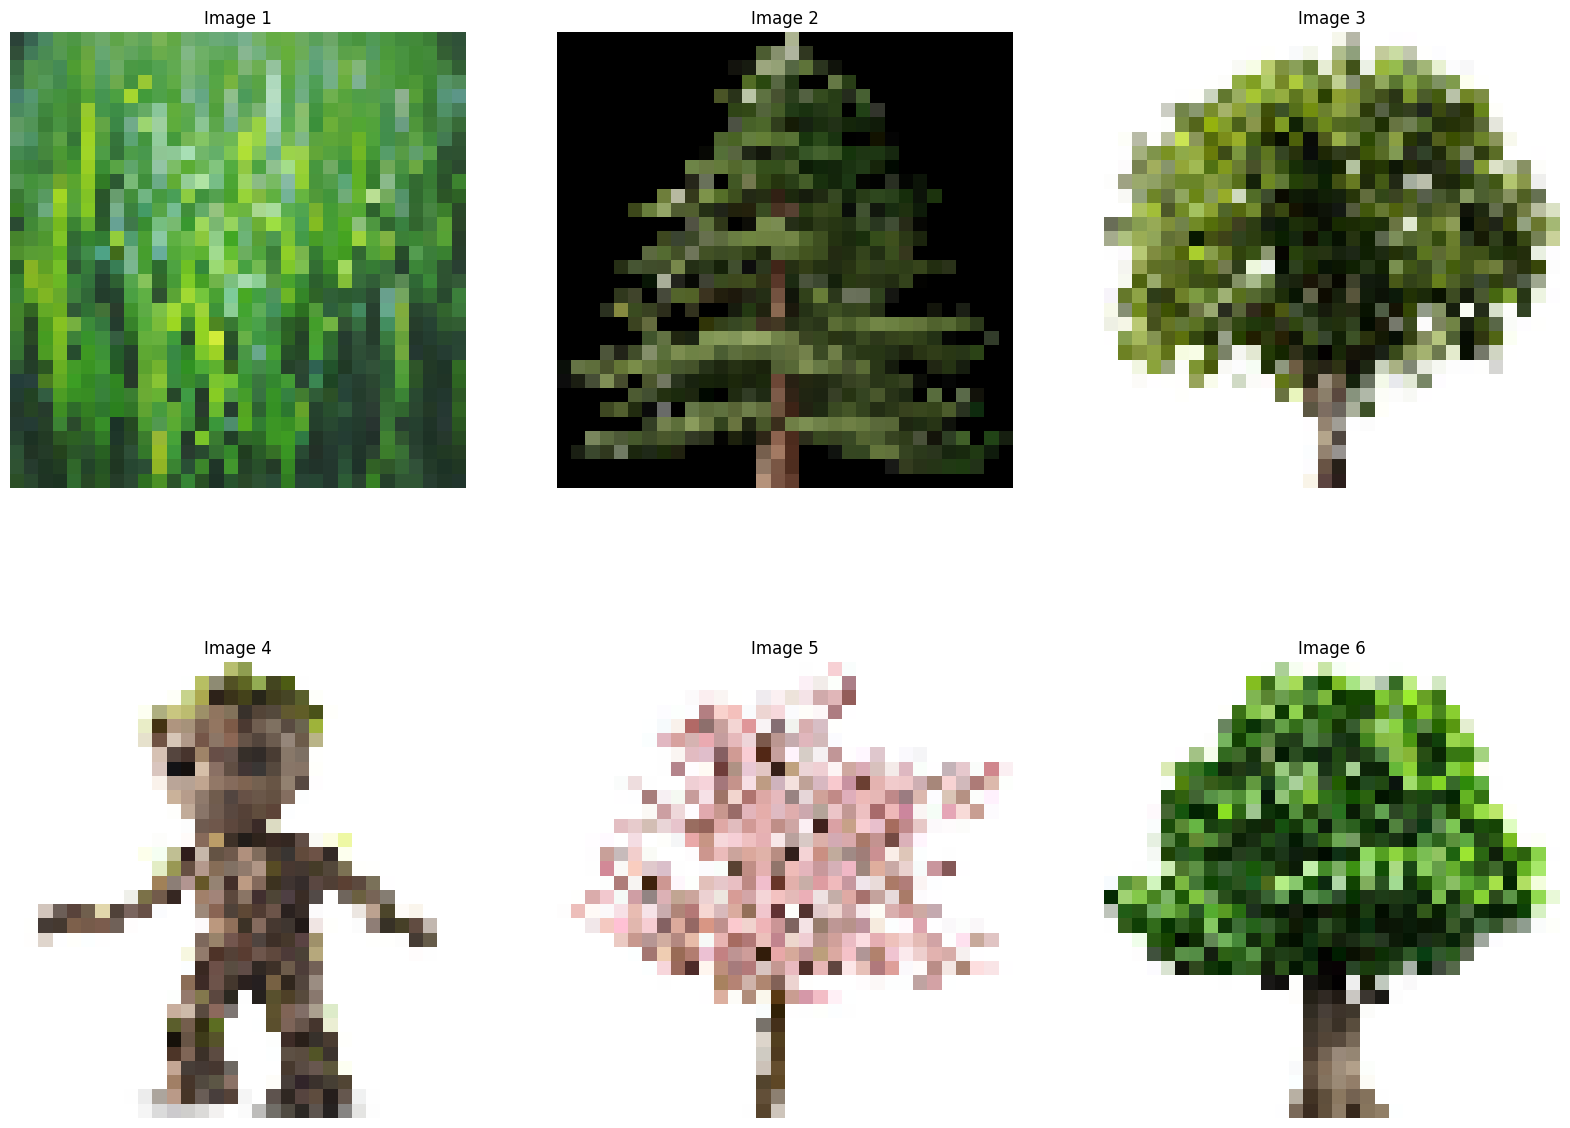

In [23]:
fig = plt.figure(figsize=(20,15))
row = 2
col = 3

for i in range (0, 6):
	fig.add_subplot(row,col,i+1)
	plt.axis('off')
	plt.title("Image {}".format(i+1))
	plt.imshow(image_group[i])

euc_dists = np.zeros((6,6), dtype=np.float64)

for i in range(0,6):
	for j in range(i,6):
		dist = euclidean_dist_mat(image_group[i], image_group[j])
		euc_dists[i,j] = dist
		print("Euclidean Distance of {img1} & {img2}: {dist:.4f}".format(img1=i+1, img2=j+1, dist=dist))

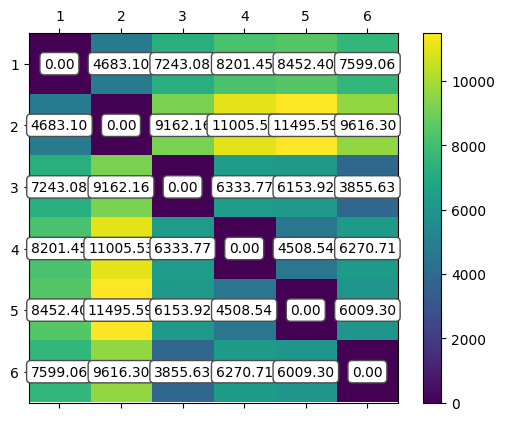

In [24]:
print_dists(euc_dists)

The most similar images are 3 and 6 with a euclidean distance of 3855.6347. This is to be expected as they are both green trees with a white background. If Image 2 also contained a white background, would the results be different?

In [25]:
#read png with its alpha channel
img = cv.imread('data2.png', cv.IMREAD_UNCHANGED)
trans_mask = img[:,:,3] == 0
img[trans_mask] = [255,255,255,255]

image_group[1] = cv.resize(cv.cvtColor(img, cv.COLOR_BGRA2RGB), (32,32))


Euclidean Distance of 1 & 1: 0.0000
Euclidean Distance of 1 & 2: 7046.5456
Euclidean Distance of 1 & 3: 7243.0751
Euclidean Distance of 1 & 4: 8201.4538
Euclidean Distance of 1 & 5: 8452.4018
Euclidean Distance of 1 & 6: 7599.0607
Euclidean Distance of 2 & 2: 0.0000
Euclidean Distance of 2 & 3: 6163.8584
Euclidean Distance of 2 & 4: 6115.6356
Euclidean Distance of 2 & 5: 6561.3854
Euclidean Distance of 2 & 6: 6427.6981
Euclidean Distance of 3 & 3: 0.0000
Euclidean Distance of 3 & 4: 6333.7716
Euclidean Distance of 3 & 5: 6153.9218
Euclidean Distance of 3 & 6: 3855.6347
Euclidean Distance of 4 & 4: 0.0000
Euclidean Distance of 4 & 5: 4508.5429
Euclidean Distance of 4 & 6: 6270.7130
Euclidean Distance of 5 & 5: 0.0000
Euclidean Distance of 5 & 6: 6009.2999
Euclidean Distance of 6 & 6: 0.0000


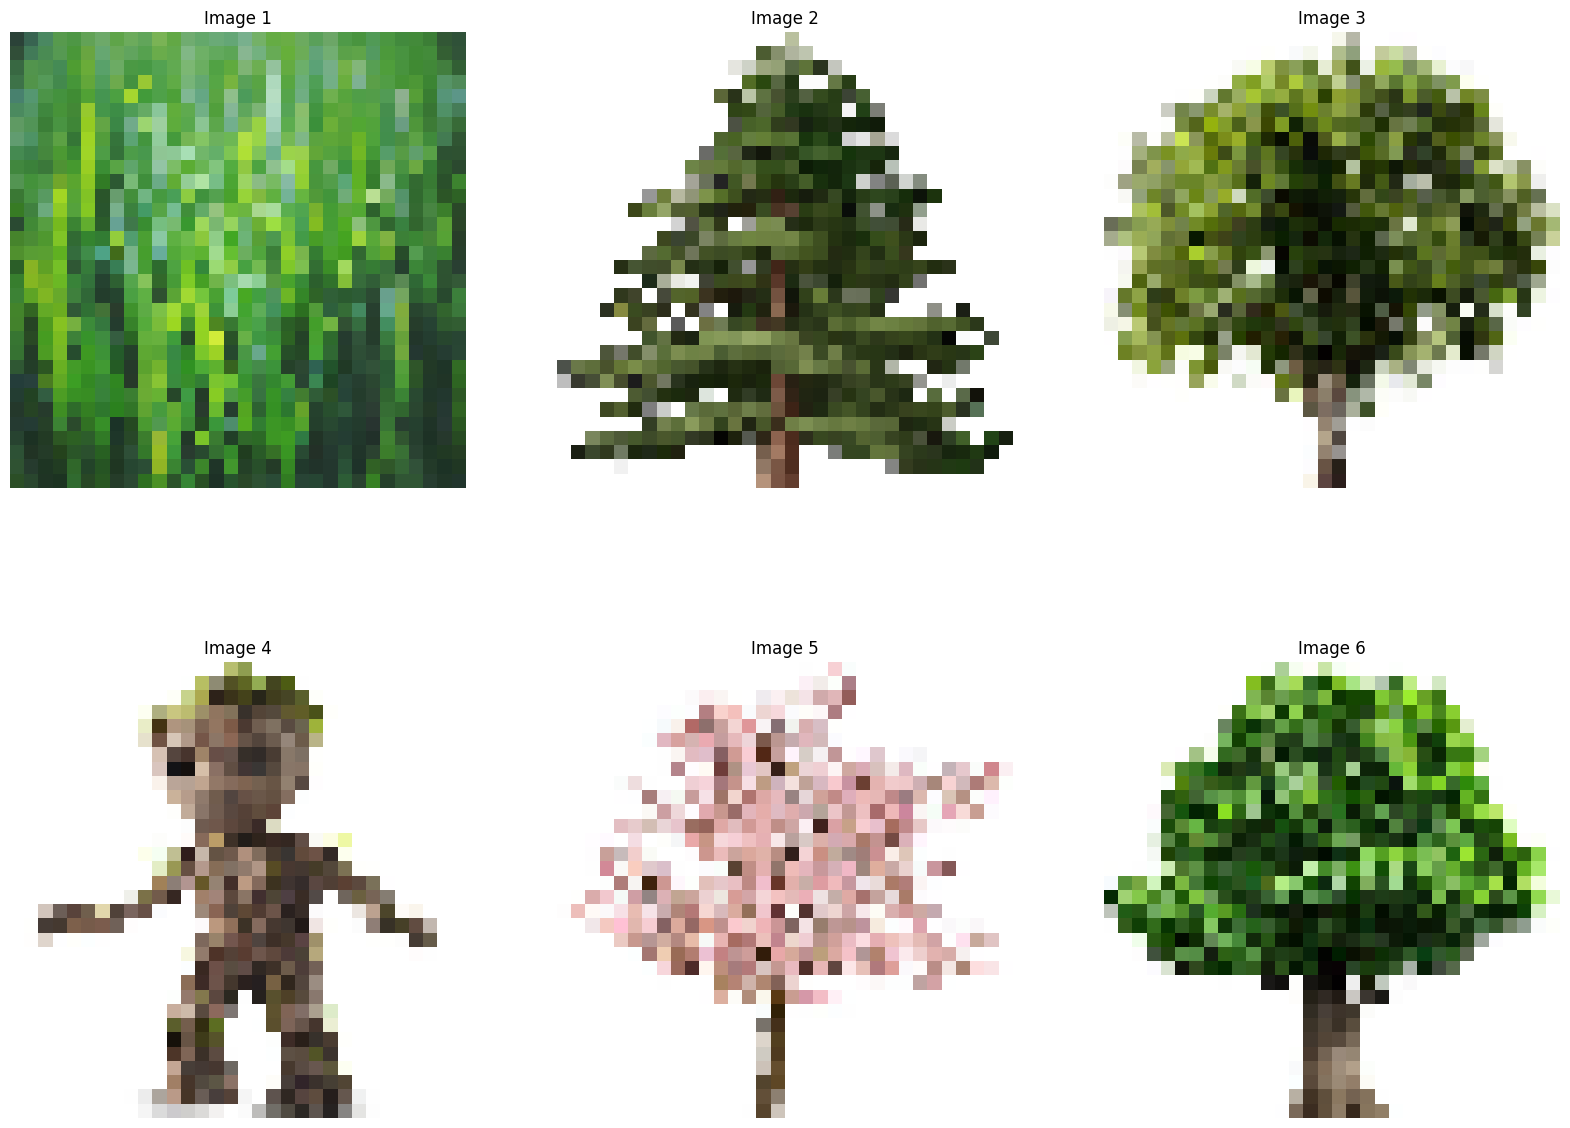

In [26]:
fig = plt.figure(figsize=(20,15))
row = 2
col = 3

for i in range (0, 6):
	fig.add_subplot(row,col,i+1)
	plt.axis('off')
	plt.title("Image {}".format(i+1))
	plt.imshow(image_group[i])

euc_dists = np.zeros((6,6), dtype=np.float64)

for i in range(0,6):
	for j in range(i,6):
		dist = euclidean_dist_mat(image_group[i], image_group[j])
		euc_dists[i,j] = dist
		print("Euclidean Distance of {img1} & {img2}: {dist:.4f}".format(img1=i+1, img2=j+1, dist=dist))

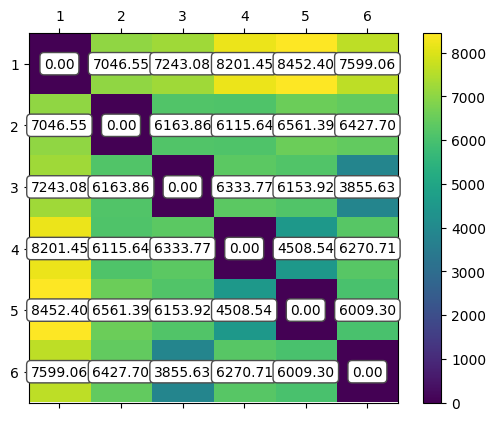

In [27]:
print_dists(euc_dists)

Comparisons with image 2 show a significant improvement in the euclidean distance between all the images, but is still not enough to beat the similarity of the image 3-6 pair.

### Image 1 vs 3 vs 5

In [28]:
print("Euclidean Distance of {img1} & {img2}: {dist:.4f}".format(img1=1, img2=3, dist=euc_dists[0,2]))
print("Euclidean Distance of {img1} & {img2}: {dist:.4f}".format(img1=1, img2=5, dist=euc_dists[0,4]))
print("Euclidean Distance of {img1} & {img2}: {dist:.4f}".format(img1=3, img2=5, dist=euc_dists[2,4]))

Euclidean Distance of 1 & 3: 7243.0751
Euclidean Distance of 1 & 5: 8452.4018
Euclidean Distance of 3 & 5: 6153.9218


Even though the general colors are similar for images 1 and 3, images 3 and 5 have a closer euclidean distance due to having a similar structure (both being trees), paired with the aforementioned white background similarity providing even more similarities compared to the largely green image of 1.